In [27]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import yfinance as yf

In [28]:
driver = webdriver.Chrome()
driver.get("https://www.fidelity.com/stock-trading/previous-year-ipos")

span_elem = driver.find_element(By.XPATH, '//*[@id="2024"]')
cells = span_elem.find_elements(By.XPATH, ".//td")
rows = []
current_row = {}

for td in cells:
    col_name = td.get_attribute("id")
    value = td.text.strip()

    if col_name:
        current_row[col_name] = value
        
    if col_name == "Access Bookrunner": 
        rows.append(current_row)
        current_row = {}

df = pd.DataFrame(rows)

print(df)

Python(77881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(77935) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


                            Offering Pricing Date   Price Symbol Deal Type  \
0                                                            AVR       IPO   
1                  Amer Sports, Inc.   12/04/2024  $23.00     AS    ADD-ON   
2                       zSpace, Inc.   12/04/2024   $5.00   ZSPC       IPO   
3                Brazil Potash Corp.   11/26/2024  $15.00    GRO       IPO   
4                    OneStream, Inc.   11/14/2024  $31.00     OS    ADD-ON   
..                               ...          ...     ...    ...       ...   
757                      Duke Energy   03/01/2016  $72.00    DUK    ADD-ON   
758  Ollie's Bargain Outlet Holdings   02/18/2016  $19.75   OLLI    ADD-ON   
759                      Hortonworks   02/01/2016   $9.50    HDP    ADD-ON   
760                  TreeHouse Foods   01/20/2016  $65.00    THS    ADD-ON   
761           Adamas Pharmaceuticals   01/06/2016  $23.00   ADMS    ADD-ON   

                                          Lead Manager  Access 

In [29]:
cleaned_df = df.copy()
cleaned_df["Pricing Date"] = pd.to_datetime(cleaned_df["Pricing Date"], format="%m/%d/%Y", errors="coerce")
cleaned_df = cleaned_df.dropna(subset=["Pricing Date"])
cleaned_df["Bookrunner"] = (
    cleaned_df["Lead Manager"].fillna("") + " " +
    cleaned_df["Access Bookrunner"].fillna("") + " " +
    cleaned_df["Access Boorkrunner"].fillna("")
).str.strip()

cleaned_df = cleaned_df.drop(columns=["Lead Manager", "Access Bookrunner", "Access Boorkrunner"])

In [30]:
cleaned_df.head(100)

,Offering,Pricing Date,Price,Symbol,Deal Type,Bookrunner
1,"Amer Sports, Inc.",2024-12-04,$23.00,AS,ADD-ON,"BofA Merrill Lynch, JP Morgan Evercore ISI"
2,"zSpace, Inc.",2024-12-04,$5.00,ZSPC,IPO,"Roth Capital, Northland Capital Markets Roth C..."
3,Brazil Potash Corp.,2024-11-26,$15.00,GRO,IPO,"Cantor Fitzgerald, Bradesco BBI Cantor Fitzgerald"
4,"OneStream, Inc.",2024-11-14,$31.00,OS,ADD-ON,"Morgan Stanley, Goldman Sachs, KKR KKR"
5,"Vera Therapeutics, Inc.",2024-10-29,$42.00,VERA,ADD-ON,"JP Morgan, Goldman Sachs, Evercore ISI, Cantor..."
...,...,...,...,...,...,...
96,HireRight Holdings,2021-10-28,$19.00,HRT,IPO,"Credit Suisse, Goldman Sachs Credit Suisse"
97,GLOBALFOUNDRIES,2021-10-27,$47.00,GFS,IPO,"Morgan Stanley, JP Morgan, BofA Merrill Lynch,..."
98,Solo Brands,2021-10-27,$17.00,DTC,IPO,"BofA Merrill Lynch, JP Morgan, Jefferies, Citi..."
99,Arteris,2021-10-26,$14.00,AIP,IPO,"Jefferies, Cowen and Company, BMO Capital Mark..."


In [31]:
symbol = df.loc[0, "Symbol"] 

data = yf.Ticker(symbol).history(period="1y")
print(data)

                           Open  High   Low  Close  Volume  Dividends  \
Date                                                                    
2024-12-24 00:00:00-05:00  5.46  5.74  5.27   5.52   42100        0.0   
2024-12-26 00:00:00-05:00  5.50  5.60  5.40   5.49   48600        0.0   
2024-12-27 00:00:00-05:00  5.62  5.62  5.40   5.61  234900        0.0   
2024-12-30 00:00:00-05:00  5.50  5.59  5.30   5.58  109900        0.0   
2024-12-31 00:00:00-05:00  5.58  5.59  5.40   5.58   33700        0.0   
...                         ...   ...   ...    ...     ...        ...   
2025-12-17 00:00:00-05:00  4.97  5.11  4.70   4.74  104100        0.0   
2025-12-18 00:00:00-05:00  5.08  5.83  5.01   5.47  541400        0.0   
2025-12-19 00:00:00-05:00  5.50  5.50  4.90   4.94  610900        0.0   
2025-12-22 00:00:00-05:00  5.05  5.33  4.91   5.32  176900        0.0   
2025-12-23 00:00:00-05:00  5.36  5.45  5.05   5.29  176109        0.0   

                           Stock Splits  
Date    

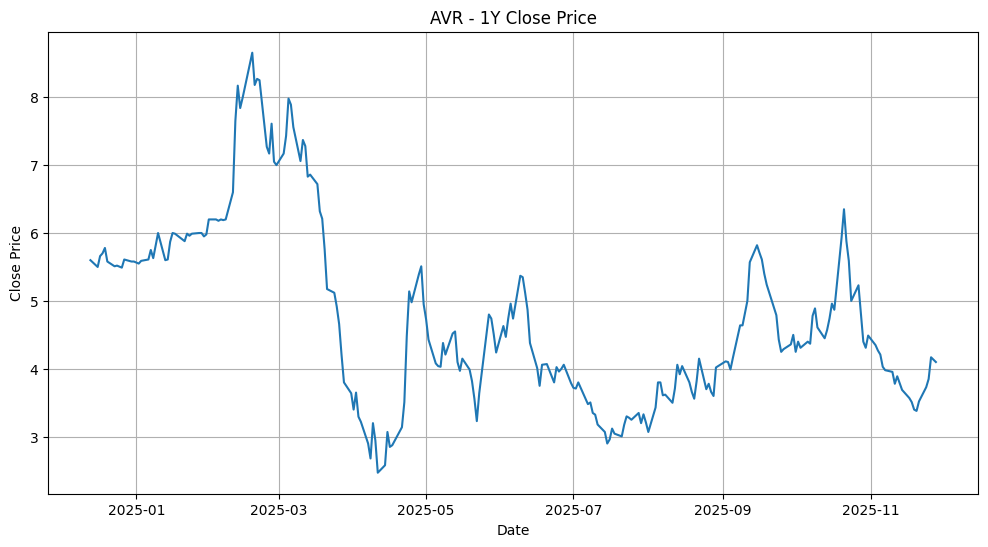

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title(f"{symbol} - 1Y Close Price")
plt.grid(True)
plt.show()